In [105]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import random as random

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'6f4ceb243793f6a90aeed94e4f17b8a4'

## Generate Cities list

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #size 1500
#zip in to a list of tuples
lat_lngs = zip(lats, lngs)
city_lat=[]
#to print zipped object
#for i in lat_lngs:
#    print(i)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Print the city count to confirm sufficient count
print(f"length of cities is {len(cities)}")
print(f"length of city_lat is {len(city_lat)}")



length of cities is 616
length of city_lat is 616


## Perform API Calls

In [139]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #use imperial to get farenheit

#build partial string query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#initialize lists to hold temperature, humidity clouds, wind, valid cities, invalid cities and valid latitudes
temp = []
humidity= []
clouds = []
wind = []
city_not_found=[]
valid_cities=[]
valid_lat=[]

for i in range(len(cities)):
    response = requests.get(query_url+cities[i]).json()
    
    if response["cod"] == "404":
        print(f"city number {i}, {cities[i]} is not found")
        city_not_found.append(cities[i])
    else:
        print(f"Getting data for city number {i}, {cities[i]}")
        valid_cities.append(cities[i])
        valid_lat.append(city_lat[i])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])

#print(f"cities list {valid_cities}, len {len(valid_cities)}")  
#print(f"temp list {temp}, len {len(temp)}")
#print(f"humidity list {humidity}, len {len(humidity)}")
#print(f"clouds list {clouds}, len {len(clouds)}")
#print(f"wind list {wind}, len {len(wind)}")
#print(f"valid city lat{valid_lat}, len {len(valid_lat)}")

Getting data for city number 0, mataura
Getting data for city number 1, mocuba
Getting data for city number 2, bredasdorp
Getting data for city number 3, les cayes
Getting data for city number 4, georgetown
Getting data for city number 5, severo-kurilsk
Getting data for city number 6, alofi
Getting data for city number 7, sorsk
city number 8, lolua is not found
Getting data for city number 9, caravelas
Getting data for city number 10, kahului
Getting data for city number 11, albany
Getting data for city number 12, rikitea
Getting data for city number 13, itoman
Getting data for city number 14, lubao
Getting data for city number 15, faanui
Getting data for city number 16, itaituba
city number 17, tsihombe is not found
Getting data for city number 18, ivanovo
Getting data for city number 19, dikson
Getting data for city number 20, yellowknife
Getting data for city number 21, punta arenas
Getting data for city number 22, hilo
Getting data for city number 23, tiksi
Getting data for city nu

city number 194, qibili is not found
city number 195, tungkang is not found
Getting data for city number 196, abnub
Getting data for city number 197, turukhansk
Getting data for city number 198, ambatondrazaka
Getting data for city number 199, saint-medard-en-jalles
city number 200, marcona is not found
Getting data for city number 201, khatanga
Getting data for city number 202, pitimbu
Getting data for city number 203, clyde river
Getting data for city number 204, abeche
Getting data for city number 205, kodiak
Getting data for city number 206, mount isa
Getting data for city number 207, rudnogorsk
Getting data for city number 208, los llanos de aridane
city number 209, krasnoselkup is not found
Getting data for city number 210, doha
city number 211, olafsvik is not found
Getting data for city number 212, chebenki
Getting data for city number 213, takoradi
Getting data for city number 214, cockburn town
Getting data for city number 215, porto novo
Getting data for city number 216, ibr

Getting data for city number 385, hasaki
Getting data for city number 386, ixtapa
city number 387, stoyba is not found
city number 388, nguiu is not found
Getting data for city number 389, kenai
Getting data for city number 390, rio gallegos
Getting data for city number 391, camopi
Getting data for city number 392, lufilufi
Getting data for city number 393, dargaville
Getting data for city number 394, zherdevka
Getting data for city number 395, doctor arroyo
Getting data for city number 396, meadow lake
Getting data for city number 397, atar
Getting data for city number 398, saurimo
Getting data for city number 399, saint-junien
Getting data for city number 400, college
Getting data for city number 401, pasighat
city number 402, crab hill is not found
Getting data for city number 403, san ignacio
Getting data for city number 404, nioro
Getting data for city number 405, severodvinsk
Getting data for city number 406, venta
Getting data for city number 407, amga
Getting data for city numb

Getting data for city number 577, kibiti
Getting data for city number 578, tynda
Getting data for city number 579, zhangjiakou
Getting data for city number 580, ceuta
city number 581, zolotinka is not found
Getting data for city number 582, kot radha kishan
Getting data for city number 583, sanary-sur-mer
city number 584, jiddah is not found
Getting data for city number 585, hantsport
Getting data for city number 586, kurilsk
Getting data for city number 587, venice
Getting data for city number 588, manjacaze
Getting data for city number 589, kudahuvadhoo
Getting data for city number 590, humboldt
Getting data for city number 591, katete
Getting data for city number 592, salamiyah
Getting data for city number 593, grand gaube
Getting data for city number 594, pointe-noire
Getting data for city number 595, porirua
Getting data for city number 596, kiama
Getting data for city number 597, dali
Getting data for city number 598, baghdad
city number 599, jatoi is not found
Getting data for c

## Create master table

In [141]:
#create dictionary of cities, temp, humidity, clouds, and wind
d = {"Cities": valid_cities, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Latitude":valid_lat}

#convert dictionary to dataframe
df = pd.DataFrame(d)

#save csv of all data retrieved
df.to_csv("data_retrieved.csv")
df.head()

,Cities,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,mataura,55.00,70,84,8.99,-58.028119
1,mocuba,73.35,96,100,2.71,-17.883372
2,bredasdorp,62.49,72,100,2.24,-65.887510
3,les cayes,81.25,62,0,6.31,16.062908
4,georgetown,83.39,74,20,6.93,-2.959873


## Plot tables

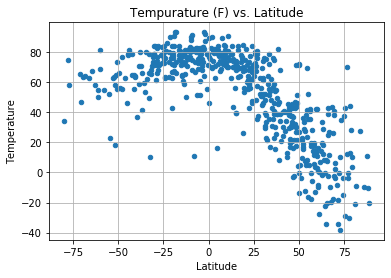

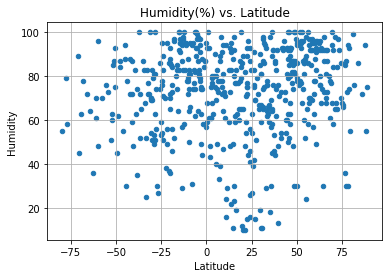

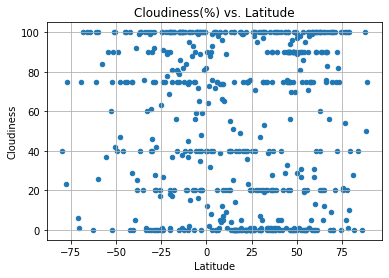

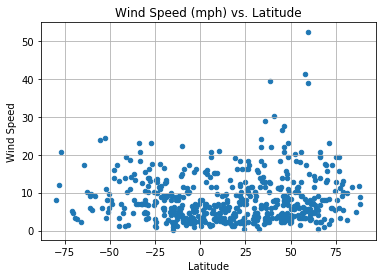

In [142]:
#plot latitude and temperature
df.plot(kind="scatter", x="Latitude", y="Temperature")
plt.title("Tempurature (F) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/temp_latitude.png")
plt.show()

#plot latitude and humidity
df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.title("Humidity(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/humidity_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.title("Cloudiness(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/cloudiness_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/wind_latitude.png")
plt.show()

In [143]:
#Get sample response for reference

response=requests.get("http://api.openweathermap.org/data/2.5/weather?appid=6f4ceb243793f6a90aeed94e4f17b8a4&units=imperial&q=paris").json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.86, 'lon': 2.35},
 'dt': 1578348642,
 'id': 2988507,
 'main': {'feels_like': 37.71,
          'humidity': 93,
          'pressure': 1025,
          'temp': 42.98,
          'temp_max': 44.01,
          'temp_min': 41},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6540,
         'sunrise': 1578296602,
         'sunset': 1578326913,
         'type': 1},
 'timezone': 3600,
 'visibility': 3300,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09n',
              'id': 300,
              'main': 'Drizzle'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 190, 'speed': 5.82}}
